In [ ]:
# Introduction
# 사고 자동차 이미지를 수집한 AI 데이터셋으로, 차량 외관 부품의 세그멘테이션과 손상 유형 및 범위를 이해할 수 있는 형태로 가공된 다양한 차종 및 부품에 대한 학습 데이터셋 구축

In [ ]:
# Obgective
# 자동차 사고 시 발생하는 다양한 유형의 사고 이미지로부터 손상 유형, 손상 부위, 손상 심각도를 도출해낼 수 있는 인공지능 개발을 위한 데이터셋

In [2]:
# Damaged Veichle Data_Sample.zip 파일을 압축 해제

import zipfile
import os

# 파일 경로를 지정합니다.
zip_file_path = '/content/Damaged Veichle Data_Sample.zip'  # 실제 파일 경로로 변경해야 합니다.

# 압축 해제할 디렉토리 경로를 지정합니다. (현재 디렉토리에 압축을 해제합니다.)
extract_dir = '/content'

# 압축 파일이 존재하는지 확인합니다.
if not os.path.exists(zip_file_path):
    print(f"Error: {zip_file_path} not found.")
else:
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted {zip_file_path} to {extract_dir}")

    except zipfile.BadZipFile:
        print(f"Error: {zip_file_path} is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")

Successfully extracted /content/Damaged Veichle Data_Sample.zip to /content


In [3]:
# /content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage
import json
import glob
import os
import pandas as pd

# JSON 파일 경로 설정
json_path = '/content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage/*.json'

# 모든 JSON 파일 로드
data = []

for file in glob.glob(json_path):
    with open(file, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
        #print(f"Loading data from: {file}")  # 파일 이름 출력

        # 필요한 데이터 추출
        if 'annotations' in json_data:  # annotations 키 확인
            for annotation in json_data['annotations']:
                data.append({
                    'category_id': annotation.get('category_id', None),
                    'damage': annotation.get('damage', None),
                    'color': annotation.get('color', None),
                    'file_name': json_data['images']['file_name']  # 이미지 파일 이름 추가
                })

# 데이터프레임 생성
df = pd.DataFrame(data)

In [4]:
df

,category_id,damage,color,file_name
0,sc-148576,Scratched,White,0369940_sc-148576.jpg
1,sc-148576,Scratched,White,0369940_sc-148576.jpg
2,sc-148576,Scratched,White,0369940_sc-148576.jpg
3,sc-148576,Scratched,White,0369940_sc-148576.jpg
4,sc-163472,Scratched,White,0097870_sc-163472.jpg
...,...,...,...,...
3793,sc-143081,Breakage,White,0141496_sc-143081.jpg
3794,sc-143081,Breakage,White,0141496_sc-143081.jpg
3795,sc-143081,Scratched,White,0141496_sc-143081.jpg
3796,as-2702050,Separated,Blue tone,0250749_as-2702050.jpg


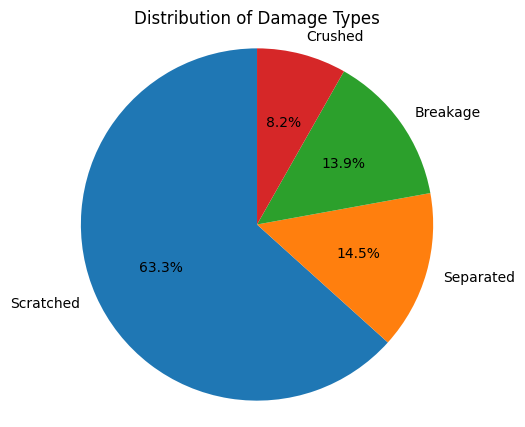

In [5]:
# 파이차트로 damage의 비중을 나타내는 코드를 만들기

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame as defined in the previous code

# Count the occurrences of each damage type
damage_counts = df['damage'].value_counts()

# Create the pie chart
plt.figure(figsize=(5, 5))  # Adjust figure size as needed
plt.pie(damage_counts, labels=damage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Damage Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

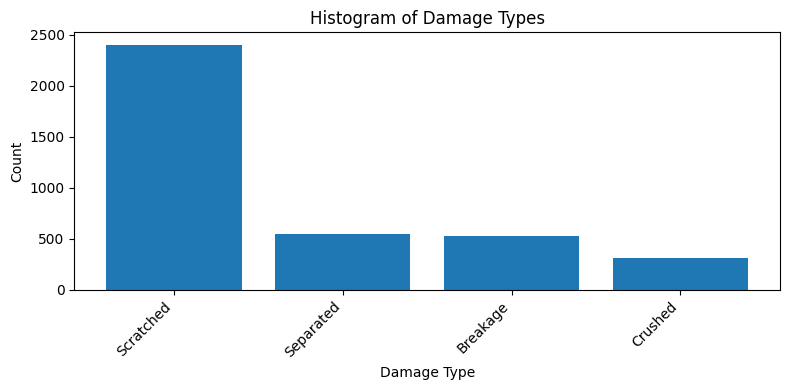

In [6]:
# damage 유형에 해당하는 Scratched, Seperated, Crushed, Breakage의 개수를 나타내는 히스토그램 생성

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame as defined in the previous code

# Count the occurrences of each damage type
damage_counts = df['damage'].value_counts()

# Create the histogram
plt.figure(figsize=(8, 4))
plt.bar(damage_counts.index, damage_counts.values)
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.title("Histogram of Damage Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [8]:
# df에서 filename에 따른 damage 유형을 확인하는 코드를 만들기

# Display damage types for each filename
filename_damage = df.groupby('file_name')['damage'].apply(list)
filename_damage

,damage
file_name,
0000459_sc-226797.jpg,[Separated]
0000802_as-7929891.jpg,"[Crushed, Scratched]"
0001061_sc-123724.jpg,"[Separated, Scratched, Scratched, Scratched, S..."
0001146_sc-149689.jpg,[Breakage]
0001505_as-2951606.jpg,"[Breakage, Separated, Separated, Crushed]"
...,...
0505076_sc-207368.jpg,"[Crushed, Scratched, Scratched, Scratched, Cru..."
0505091_as-0100005.jpg,"[Separated, Breakage]"
0505154_as-7511257.jpg,"[Breakage, Scratched]"


In [9]:
# filename_damage에서 damage 가 2개 이상 적힌 file_name만 나타내기

filtered_filenames = filename_damage[filename_damage.apply(len) >= 2]

# 필터링된 파일 이름 출력
len(filtered_filenames)

855

crop할 사진을 모을 파일 생성

In [10]:
# 필요한 라이브러리 호출
import json
import os
from PIL import Image
import glob


In [11]:
# 필요한 부분만 사진 crop 진행
def crop_damages(image_path, json_path, output_dir):

    """
    Crops images based on bounding box coordinates from a JSON file.
    """
    try:
        with open(json_path, 'r') as f:
            json_data = json.load(f)
    except FileNotFoundError:
        print(f"Error: JSON file not found at {json_path}")
        return
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON file at {json_path}")

        return

    try:
        with Image.open(image_path) as img:
            # Convert image to RGB mode if it's RGBA
            if img.mode == 'RGBA':
                img = img.convert('RGB')

            image_name = os.path.splitext(os.path.basename(image_path))[0]

            for i, annotation in enumerate(json_data['annotations']):
                bbox = annotation['bbox']
                damage_type = annotation['damage']
                left, top, width, height = bbox
                right = left + width
                bottom = top + height

                try:
                    cropped_img = img.crop((left, top, right, bottom))
                    # Convert cropped image to RGB if necessary
                    if cropped_img.mode == 'RGBA':
                        cropped_img = cropped_img.convert('RGB')

                    resized_img = cropped_img.resize((50, 50))

                    output_filename = f"{image_name}_{damage_type.lower()}_{i+1}.jpg"
                    output_path = os.path.join(output_dir, output_filename)
                    resized_img.save(output_path, 'JPEG')

                except Exception as e:
                    print(f"Error cropping image {image_path}: {e}")
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")


In [12]:
# crop된 사진 저장할 파일 만들기
def process_images(image_dir, json_dir, output_base_dir):

    """
    Processes all images in the specified directory.
    """
    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)

    image_files = glob.glob(os.path.join(image_dir, '*.jpg'))
    for image_path in image_files:
        image_name = os.path.splitext(os.path.basename(image_path))[0]
        json_name = image_name + '.json'
        json_path = os.path.join(json_dir, json_name)

        output_dir = os.path.join(output_base_dir, image_name + "_crops")
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        crop_damages(image_path, json_path, output_dir)

# Example usage
image_directory = '/content/Damaged Veichle Data_Sample/raw data/TS_damage/damage/'
json_directory = '/content/Damaged Veichle Data_Sample/labeling data/TL_damage/damage/'
output_directory = '/content/crop_images'

process_images(image_directory, json_directory, output_directory)

분류 모델 만들기

In [13]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

------------------------------------------------------------------------------

crop_images 의 사진의 damage를 숫자로 인코딩


In [15]:
# 사진에 따른 damage 유형을 데이터 프레임으로 만들기
df_all = pd.DataFrame(glob.glob('/content/crop_images/*/*'), columns=['file_name'])
df_all

,file_name
0,/content/crop_images/0105230_sc-183329_crops/0...
1,/content/crop_images/0105230_sc-183329_crops/0...
2,/content/crop_images/0105230_sc-183329_crops/0...
3,/content/crop_images/0105230_sc-183329_crops/0...
4,/content/crop_images/0484948_sc-132079_crops/0...
...,...
3793,/content/crop_images/0125390_as-7509711_crops/...
3794,/content/crop_images/0068041_sc-230154_crops/0...
3795,/content/crop_images/0068041_sc-230154_crops/0...
3796,/content/crop_images/0068041_sc-230154_crops/0...


In [16]:
df_all['damage'] = df_all['file_name'].apply(lambda x: x.split('_')[-2])
df_all

,file_name,damage
0,/content/crop_images/0105230_sc-183329_crops/0...,scratched
1,/content/crop_images/0105230_sc-183329_crops/0...,scratched
2,/content/crop_images/0105230_sc-183329_crops/0...,scratched
3,/content/crop_images/0105230_sc-183329_crops/0...,crushed
4,/content/crop_images/0484948_sc-132079_crops/0...,scratched
...,...,...
3793,/content/crop_images/0125390_as-7509711_crops/...,crushed
3794,/content/crop_images/0068041_sc-230154_crops/0...,scratched
3795,/content/crop_images/0068041_sc-230154_crops/0...,scratched
3796,/content/crop_images/0068041_sc-230154_crops/0...,scratched


In [17]:
# damage type을 {'Separated':0, 'Breakage':1, 'Scratched':2, 'Crushed':3}으로 라벨링
damage_types = {'Separated':0, 'Breakage':1, 'Scratched':2, 'Crushed':3}

In [19]:
# df_all의 damage를 숫자로 라벨링
df_all['label'] = df_all['damage'].apply(lambda x: damage_types.get(x.capitalize(), -1))
df_all.head(10)

,file_name,damage,label
0,/content/crop_images/0105230_sc-183329_crops/0...,scratched,2
1,/content/crop_images/0105230_sc-183329_crops/0...,scratched,2
2,/content/crop_images/0105230_sc-183329_crops/0...,scratched,2
3,/content/crop_images/0105230_sc-183329_crops/0...,crushed,3
4,/content/crop_images/0484948_sc-132079_crops/0...,scratched,2
5,/content/crop_images/0484948_sc-132079_crops/0...,scratched,2
6,/content/crop_images/0235572_sc-105479_crops/0...,scratched,2
7,/content/crop_images/0235572_sc-105479_crops/0...,scratched,2
8,/content/crop_images/0235572_sc-105479_crops/0...,scratched,2
9,/content/crop_images/0267935_sc-174167_crops/0...,scratched,2


In [20]:
# 사진의 damage를 숫자로 labeling 한 데이터를 y에 저장하기 --> array
y = df_all['label'].values
y

array([2, 2, 2, ..., 2, 2, 2])

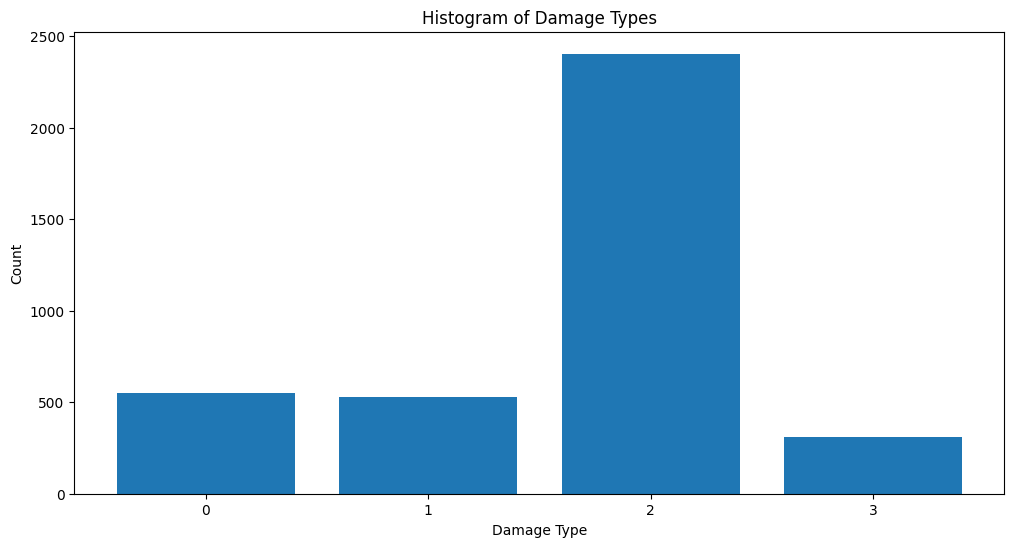

In [21]:
# y에서 0,1,2,3의 분포를 알 수 있는 히스토그램 생성

import matplotlib.pyplot as plt

# Assuming 'y' is your NumPy array of damage labels (0, 1, 2, 3)
plt.figure(figsize=(12, 6))
plt.hist(y, bins=range(5), align='left', rwidth=0.8)  # bins=range(5) for 0 to 4, align='left' for correct bin placement
plt.xticks(range(4)) # Set x-axis ticks to 0, 1, 2, 3
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.title("Histogram of Damage Types")
plt.show()

In [22]:
y.shape

(3798,)

In [58]:
# crop_images 안의 모든 사진의 픽셀을 255로 나누어 정규화한 후, array 형식으로 바꾸어 x에 저장하기
x = np.array([np.array(Image.open(file))/255.0 for file in df_all['file_name']])
x

array([[[[0.42352941, 0.42352941, 0.41568627],
         [0.42745098, 0.42745098, 0.41960784],
         [0.43137255, 0.43137255, 0.42352941],
         ...,
         [0.43137255, 0.43137255, 0.42352941],
         [0.43529412, 0.43529412, 0.42745098],
         [0.43529412, 0.43529412, 0.42745098]],

        [[0.43921569, 0.43921569, 0.43137255],
         [0.44313725, 0.44313725, 0.43529412],
         [0.44705882, 0.44705882, 0.43921569],
         ...,
         [0.43137255, 0.43137255, 0.42352941],
         [0.43921569, 0.43921569, 0.43137255],
         [0.43921569, 0.43921569, 0.43137255]],

        [[0.44705882, 0.44705882, 0.43921569],
         [0.44705882, 0.44705882, 0.43921569],
         [0.45098039, 0.45098039, 0.44313725],
         ...,
         [0.43137255, 0.43137255, 0.42352941],
         [0.42352941, 0.42352941, 0.41568627],
         [0.42352941, 0.42352941, 0.41568627]],

        ...,

        [[0.54117647, 0.54117647, 0.53333333],
         [0.54509804, 0.54509804, 0.5372549 ]

In [59]:
x.shape

(3798, 50, 50, 3)

In [60]:
# 데이터 분할 (train:0.8, validation:0.1, test:0.1)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False, random_state=42)

In [61]:
# 필요한 라이브러리 호출
import tensorflow as tf
import numpy as np
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils import to_cataegorial
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


In [67]:
# 이미지 증강
image_generator = ImageDataGenerator(
    rotation_range = 15,
    zoom_range = 0.1,
    shear_range=0.5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [64]:
# # y_train 데이터에서 0,1,2,3으로 분류되는 데이터의 비율이 모두 비슷하도록 X_train 데이터를 image_generator로 이미지 증강시키기

# from sklearn.utils import class_weight
# import numpy as np

# # Calculate class weights
# class_weights = class_weight.compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y_train),
#     y=y_train
# )

# # Convert class weights to a dictionary
# class_weight_dict = dict(enumerate(class_weights))

# # 이미지 증강 (class_weight 적용)
# image_generator.fit(X_train, augment=True)

# # flow_from_dataframe() 메서드 대신 flow() 사용
# train_generator = image_generator.flow(
#     X_train,
#     y_train,
#     batch_size=32, # 적절한 배치 크기로 조정
#     shuffle=True,
#     seed=42
# )

In [65]:
print(X_train.shape)
print(y_train.shape)

(3038, 50, 50, 3)
(3038,)


In [68]:
augment_size = 5000

# X_train에서 5000개의 샘플을 무작위로 선택
indices = np.random.permutation(len(X_train))[:5000]
x_sample = X_train[indices]

x_augmented = image_generator.flow(
    x_sample,
    batch_size=augment_size,
    shuffle=False
)

x_augmented = next(x_augmented)
y_augmented = y_train[indices]

In [69]:
print(x_augmented.shape)
print(y_augmented.shape)

(3038, 50, 50, 3)
(3038,)


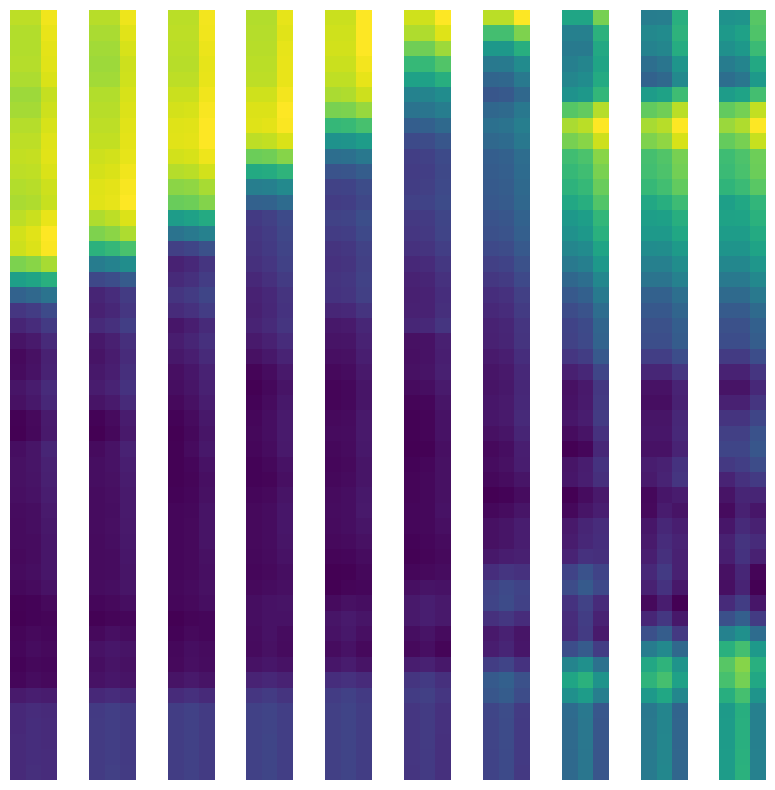

In [70]:
# 1개 이미지에 대한 증강 예시 -> 여러 이미지로 할거면 x_agument[0][i]로 수정
plt.figure(figsize=(10,10))
for i in range(1,11):
    plt.subplot(1,10,i)
    plt.imshow(x_augmented[0][i])
    plt.axis('off')
plt.show()

In [71]:
X_train = np.concatenate((X_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

In [72]:
print(X_train.shape)
print(y_train.shape)

(6076, 50, 50, 3)
(6076,)


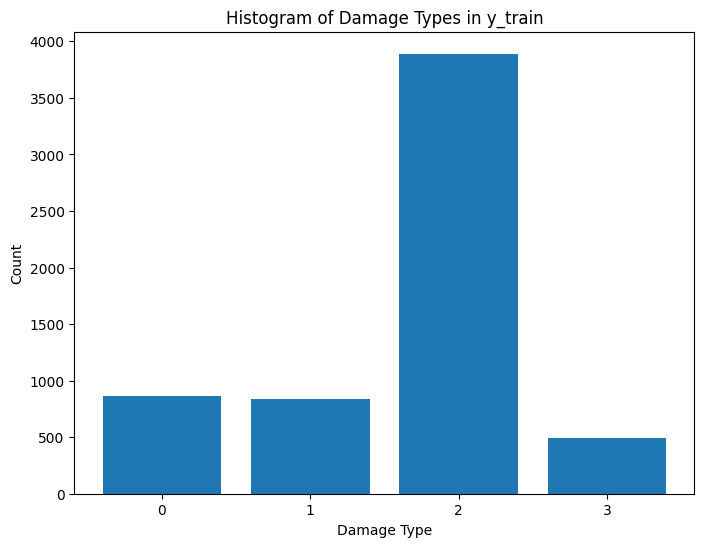

In [75]:
# prompt: y_train에서 0,1,2,3의 분포를 알 수 있는 히스토그램 생성

import matplotlib.pyplot as plt

# Assuming y_train is already defined from the previous code

plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=range(5), align='left', rwidth=0.8)
plt.xticks(range(4))  # Set x-axis ticks to 0, 1, 2, 3
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.title("Histogram of Damage Types in y_train")
plt.show()

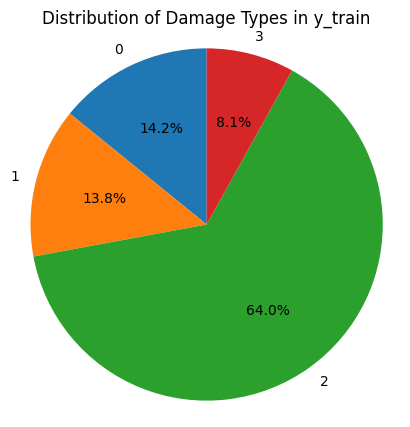

In [76]:
# prompt: y_train의 0,1,2,3 분포를 나타내는 파이차트 생성

import matplotlib.pyplot as plt

# Assuming y_train is already defined from the previous code

# Count occurrences of each class
unique, counts = np.unique(y_train, return_counts=True)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Damage Types in y_train')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# print(test_accuracy)
# print(test_loss)
# print(f1)


0.6052631735801697
1.211572527885437
0.4990509183029958


----------------------------------------------------------

In [77]:
# prompt: y 데이터에서 0,1,3으로 인코딩 된 값만 image_generator를 통해 2로 인코딩 된 데이터만큼 이미지 증강하기

# Find indices where y is 0, 1, or 3
indices_013 = np.where((y_train == 0) | (y_train == 1) | (y_train == 3))[0]

In [78]:
indices_013.shape

(2186,)

In [79]:
indices_013[:100]

array([  0,   1,   2,   3,   4,   5,   7,   9,  15,  22,  24,  30,  33,
        35,  37,  40,  47,  50,  51,  53,  54,  57,  59,  62,  64,  69,
        70,  71,  73,  74,  77,  78,  79,  84,  88,  89,  91,  92,  93,
        95,  96,  98, 102, 104, 108, 111, 116, 118, 120, 121, 125, 128,
       129, 130, 138, 139, 140, 142, 146, 151, 154, 155, 157, 158, 161,
       165, 170, 176, 181, 189, 191, 195, 196, 197, 198, 203, 208, 209,
       213, 218, 220, 222, 224, 226, 235, 237, 240, 243, 246, 250, 251,
       252, 253, 255, 257, 259, 260, 262, 265, 267])

In [80]:
# Find indices where y is 2
indices_2 = np.where(y_train == 2)[0]

In [81]:
indices_2.shape

(3890,)

In [82]:
# Number of images with damage type 2
num_images_2 = len(indices_2)

# Select images with damage types 0, 1, or 3
x_013 = X_train[indices_013]
y_013 = y_train[indices_013]

In [83]:
num_images_2

3890

In [84]:
x_013.shape

(2186, 50, 50, 3)

In [85]:
y_013.shape

(2186,)

In [86]:
# Image augmentation for classes 0, 1, and 3
image_generator = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.7,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [87]:
x_augmented_list = []
y_augmented_list = []

# Iterate through the images to be augmented
for i in range(0, len(x_013), num_images_2):
  batch_size = min(num_images_2, len(x_013) - i)
  x_batch = x_013[i:i+batch_size]
  y_batch = y_013[i:i+batch_size]

  x_augmented = image_generator.flow(
      x_batch,
      batch_size=batch_size,
      shuffle=False
  )
  x_augmented_list.append(next(x_augmented))
  y_augmented_list.append(y_batch)


In [88]:
# Concatenate augmented images and labels
x_augmented_013 = np.concatenate(x_augmented_list)
y_augmented_013 = np.concatenate(y_augmented_list)

# Concatenate the augmented data with the original training data
X_train_augmented = np.concatenate((X_train, x_augmented_013))
y_train_augmented = np.concatenate((y_train, y_augmented_013))


In [89]:
# Now X_train_augmented and y_train_augmented contain the augmented data
print(X_train_augmented.shape)
y_train_augmented.shape

(8262, 50, 50, 3)


(8262,)

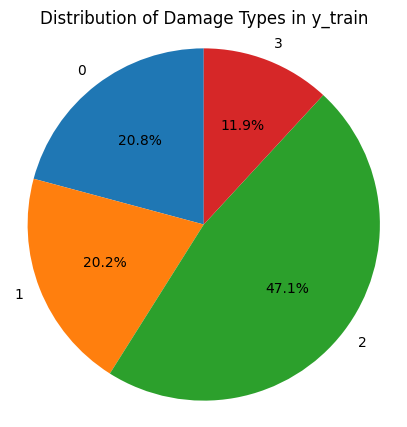

In [90]:
# prompt: y_train의 0,1,2,3 분포를 나타내는 파이차트 생성

import matplotlib.pyplot as plt

# Assuming y_train is already defined from the previous code

# Count occurrences of each class
unique, counts = np.unique(y_train_augmented, return_counts=True)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Damage Types in y_train')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

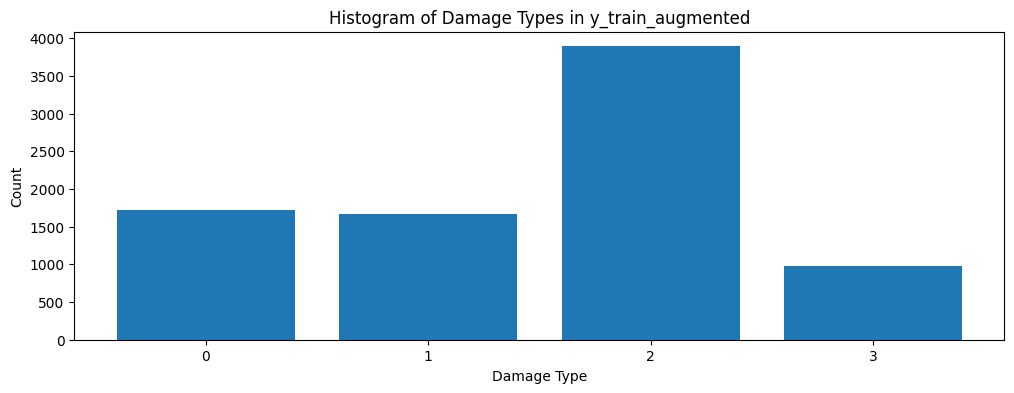

In [94]:
# prompt: y_train_augmented의 분포를 나타내는 히스토그램 생성

import matplotlib.pyplot as plt

# Assuming y_train_augmented is already defined from the previous code

plt.figure(figsize=(12, 4))
plt.hist(y_train_augmented, bins=range(5), align='left', rwidth=0.8)
plt.xticks(range(4))  # Set x-axis ticks to 0, 1, 2, 3
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.title("Histogram of Damage Types in y_train_augmented")
plt.show()

In [95]:
# prompt: y_train_augmented에서 image_generator를 통해 0,1로 라벨링된 값은 2배 증가시키고 3으로 라벨링된 값은 4배 증가

# Find indices where y_train_augmented is 0 or 1
indices_01 = np.where((y_train_augmented == 0) | (y_train_augmented == 1))[0]

# Find indices where y_train_augmented is 3
indices_3 = np.where(y_train_augmented == 3)[0]

# Number of images with damage type 3
num_images_3 = len(indices_3)

In [96]:
# Separate data based on labels
x_01 = X_train_augmented[indices_01]
y_01 = y_train_augmented[indices_01]

x_3 = X_train_augmented[indices_3]
y_3 = y_train_augmented[indices_3]

In [97]:
x_01.shape

(3392, 50, 50, 3)

In [98]:
x_3.shape

(980, 50, 50, 3)

In [99]:
# Augment class 0 and 1 (double the size)
x_augmented_list_01 = []
y_augmented_list_01 = []

for i in range(0, len(x_01), num_images_3):  # Use num_images_3 as a reference size
    batch_size = min(num_images_3, len(x_01) - i)
    x_batch = x_01[i:i + batch_size]
    y_batch = y_01[i:i + batch_size]

    x_augmented = image_generator.flow(
        x_batch,
        batch_size=batch_size,
        shuffle=False
    )
    x_augmented_list_01.append(next(x_augmented))
    y_augmented_list_01.append(y_batch)

x_augmented_01 = np.concatenate(x_augmented_list_01)
y_augmented_01 = np.concatenate(y_augmented_list_01)


In [100]:
x_augmented_01.shape

(3392, 50, 50, 3)

In [102]:
x_augmented_01

array([[[[0.19126888, 0.23147815, 0.21479829],
         [0.23771918, 0.29421338, 0.26538393],
         [0.11860479, 0.18527146, 0.1538989 ],
         ...,
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098]],

        [[0.19366333, 0.23421468, 0.21719274],
         [0.23592333, 0.2927596 , 0.26384464],
         [0.11492759, 0.18159427, 0.1502217 ],
         ...,
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098]],

        [[0.19605778, 0.23695119, 0.21958719],
         [0.23412749, 0.29130584, 0.26230535],
         [0.11125039, 0.17791706, 0.1465445 ],
         ...,
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098],
         [0.02352941, 0.03137255, 0.02745098]],

        ...,

        [[0.9559852 , 0.5089956 , 0.50940573],
         [0.9581054 , 0.5208336 , 0.5211141 ]

In [103]:
y_augmented_01.shape

(3392,)

In [104]:
# Augment class 3 (quadruple the size)
x_augmented_list_3 = []
y_augmented_list_3 = []
for _ in range(4):  # Loop 4 times for quadrupling the data
    for i in range(0, len(x_3), num_images_3):
        batch_size = min(num_images_3, len(x_3) - i)
        x_batch = x_3[i:i + batch_size]
        y_batch = y_3[i:i + batch_size]

        x_augmented = image_generator.flow(
            x_batch,
            batch_size=batch_size,
            shuffle=False
        )
        x_augmented_list_3.append(next(x_augmented))
        y_augmented_list_3.append(y_batch)

x_augmented_3 = np.concatenate(x_augmented_list_3)
y_augmented_3 = np.concatenate(y_augmented_list_3)

In [105]:
x_augmented_3.shape

(3920, 50, 50, 3)

In [106]:
x_augmented_3

array([[[[0.95446616, 0.95686275, 0.7355116 ],
         [0.9331499 , 0.9387207 , 0.7030234 ],
         [0.9094901 , 0.9182352 , 0.6675686 ],
         ...,
         [0.65969265, 0.67402345, 0.31217334],
         [0.6171065 , 0.6327928 , 0.26234654],
         [0.6046499 , 0.6203362 , 0.24885857]],

        [[0.95463735, 0.95686275, 0.7361964 ],
         [0.9352042 , 0.94060385, 0.7057625 ],
         [0.9088054 , 0.9173792 , 0.66739744],
         ...,
         [0.6627742 , 0.67693377, 0.31593966],
         [0.61881846, 0.63450474, 0.2642297 ],
         [0.6032803 , 0.6189666 , 0.24731779]],

        [[0.95480853, 0.95686275, 0.7368812 ],
         [0.9372586 , 0.94248706, 0.70850164],
         [0.9081206 , 0.9165232 , 0.66722625],
         ...,
         [0.6658557 , 0.67984414, 0.319706  ],
         [0.6205304 , 0.6362167 , 0.2661129 ],
         [0.60191077, 0.61759704, 0.24577703]],

        ...,

        [[0.90141344, 0.9027528 , 0.609878  ],
         [0.91422325, 0.91542965, 0.6219311 ]

In [107]:
# Combine augmented data with the original data
X_train_final = np.concatenate((X_train_augmented, x_augmented_01, x_augmented_3))
y_train_final = np.concatenate((y_train_augmented, y_augmented_01, y_augmented_3))

print(X_train_final.shape)
print(y_train_final.shape)

(15574, 50, 50, 3)
(15574,)


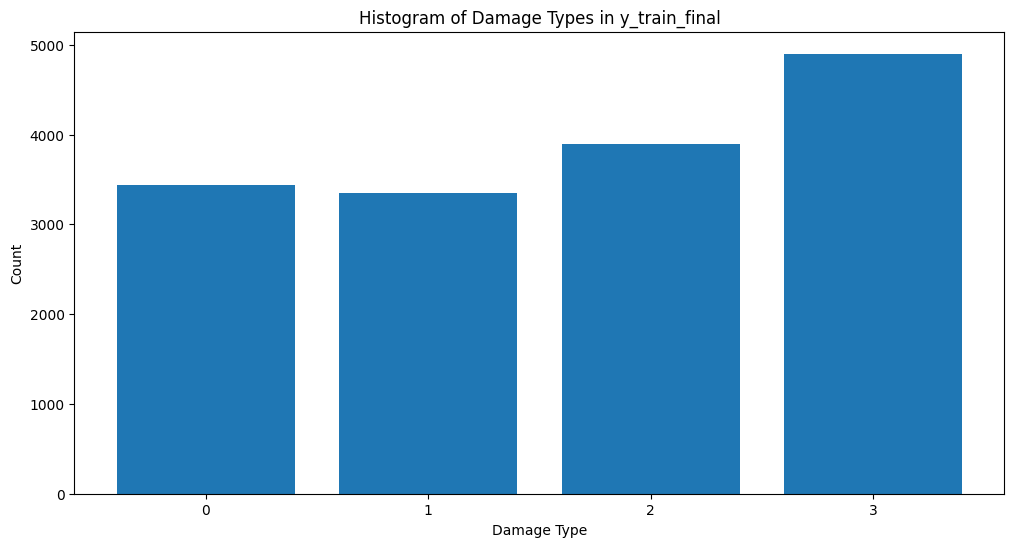

In [108]:
# Visualize the distribution of the final training labels
plt.figure(figsize=(12, 6))
plt.hist(y_train_final, bins=range(5), align='left', rwidth=0.8)
plt.xticks(range(4))
plt.xlabel("Damage Type")
plt.ylabel("Count")
plt.title("Histogram of Damage Types in y_train_final")
plt.show()

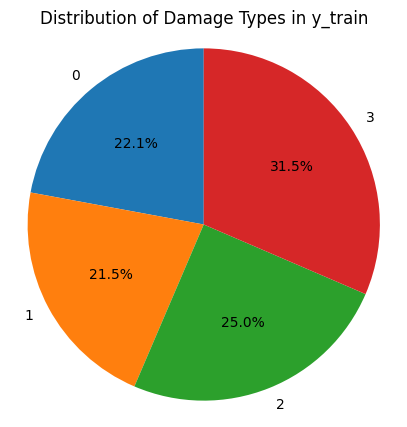

In [109]:
# Count occurrences of each class
unique, counts = np.unique(y_train_final, return_counts=True)

# Create the pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Damage Types in y_train')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [131]:
pd.value_counts(y_train_final)

<ipython-input-131-64ce0d3a68fc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train_final)


,count
3,4900
2,3890
0,3440
1,3344


**사전학습 resnet 모델 사용**

In [137]:
# resnet을 사용하여 사전학습된 모델 사용
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

def create_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))
    # Freeze the base model layers
    #base_model.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    return model

# 모델 생성 및 컴파일
model = create_resnet_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [138]:
# 모델 학습
history = model.fit(X_train_final, y_train_final,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_val, y_val))
                    #callbacks=[early_stopping]) # Add early stopping callback

Epoch 1/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 96s 185ms/step - accuracy: 0.4205 - loss: 1.4295 - val_accuracy: 0.6342 - val_loss: 1.6510
Epoch 2/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 0.5750 - loss: 1.0187 - val_accuracy: 0.6237 - val_loss: 1.4870
Epoch 3/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.6427 - loss: 0.9046 - val_accuracy: 0.2921 - val_loss: 1.3498
Epoch 4/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.6584 - loss: 0.8483 - val_accuracy: 0.3895 - val_loss: 1.3064
Epoch 5/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 17s 71ms/step - accuracy: 0.7217 - loss: 0.7041 - val_accuracy: 0.5737 - val_loss: 1.0169
Epoch 6/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 20s 69ms/step - accuracy: 0.7526 - loss: 0.6635 - val_accuracy: 0.4289 - val_loss: 1.5389
Epoch 7/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.7457 - loss: 0.6612 - val_accuracy: 0.6974 - val_loss: 0.9227
Epoch 8/50
244/244 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.7729 - loss: 0.5817 -

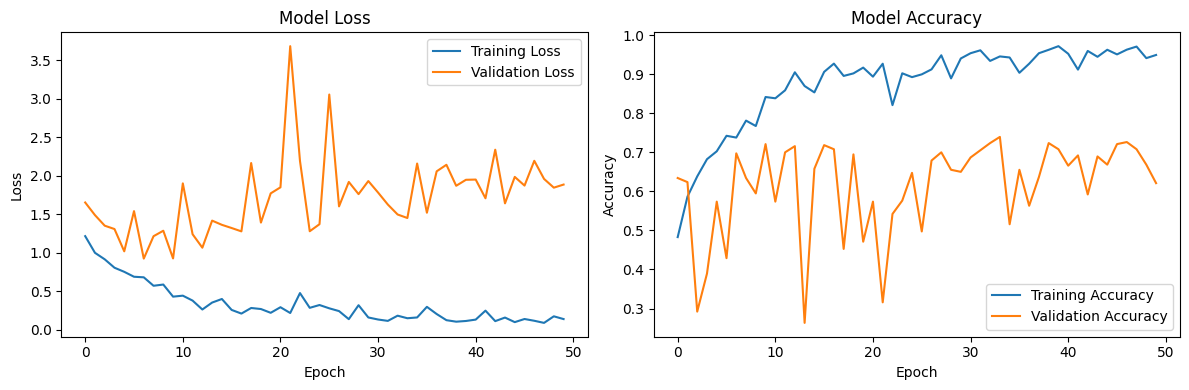

In [139]:
# 결과 시각화
plt.figure(figsize=(12,4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
#plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [140]:
# 테스트 세트에서 성능 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_pred, average='weighted')

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.6639 - loss: 1.6003
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step


In [141]:
print(test_accuracy)
print(test_loss)
print(f1)

0.6499999761581421
1.7586936950683594
0.6649613861050321


In [142]:
y_pred

array([0, 2, 0, 2, 3, 1, 1, 3, 2, 2, 2, 0, 0, 3, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 0, 2, 2, 0, 2, 3, 1, 2, 3, 1, 0, 2, 3, 1, 2, 2, 3, 3, 1, 2, 2,
       2, 0, 1, 3, 0, 2, 3, 2, 2, 2, 3, 0, 2, 1, 2, 2, 3, 2, 2, 0, 1, 0,
       2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 0, 0, 1, 2, 0, 3, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 1, 3,
       1, 3, 2, 2, 2, 2, 0, 2, 3, 1, 1, 1, 3, 2, 0, 0, 2, 3, 2, 2, 0, 2,
       1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 3, 1, 2, 2, 1, 0, 2,
       2, 3, 3, 0, 2, 2, 3, 3, 1, 0, 2, 1, 3, 2, 3, 2, 2, 2, 1, 1, 0, 2,
       2, 2, 2, 1, 3, 0, 2, 0, 0, 2, 0, 2, 0, 1, 3, 3, 3, 1, 1, 1, 1, 2,
       2, 3, 0, 2, 1, 1, 3, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 0, 3, 2,
       1, 0, 0, 2, 3, 1, 3, 0, 2, 2, 2, 0, 3, 2, 3, 2, 1, 0, 2, 0, 3, 2,
       2, 1, 3, 0, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 0, 2,
       2, 0, 0, 2, 1, 2, 2, 3, 3, 3, 0, 1, 0, 3, 1, 3, 3, 1, 2, 0, 2, 0,
       0, 1, 1, 3, 2, 3, 2, 2, 2, 0, 3, 2, 0, 0, 2,

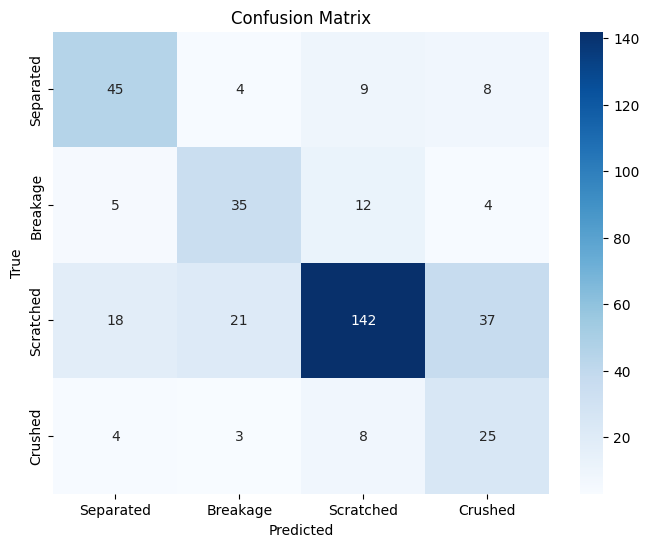

In [145]:
# prompt: 학습결과에 기반하여 혼동행렬 생성

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are already defined from the previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Separated', 'Breakage', 'Scratched', 'Crushed'],
            yticklabels=['Separated', 'Breakage', 'Scratched', 'Crushed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

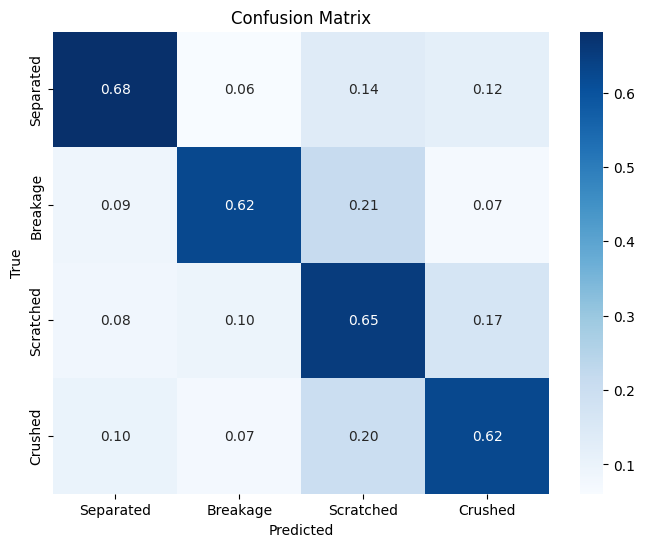

In [146]:
# prompt: 학습결과를 바탕으로 혼동행렬을 %로 나타내기

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from the previous code

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix using seaborn with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Separated', 'Breakage', 'Scratched', 'Crushed'],
            yticklabels=['Separated', 'Breakage', 'Scratched', 'Crushed'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()